### Getting Data from PostgreSQL DB

Prior to this we have successfull obtained our dataset from Kaggle and migrated it from a `sqlite` database to a `PostgreSQL` database. Now we can query from it using the `psycopg2` package.

#### Required Packages

In [70]:
import pandas as pd       # Data manipulation
import psycopg2           # Query against psql dbs
import numpy as np        # math and arrays
import matplotlib.pyplot as plt # plotting
from scipy import stats # Stats calculations
import seaborn as sns

#### Create Connection

We stored out data in a `PostgreSQL` database named `soccer`.

In [9]:
conn = psycopg2.connect("dbname=soccer")

---

---

### Set up queries

We will write queries for each of our proposed hypothesis tests.

#### 1) Is there a statistical difference in the odds of winning a game when a team is playing in front of their home crowd?

In [10]:
query_1 = """
    select
        c.name as country_name
        ,l.name as league_name
        ,ht.team_short_name as home_team_short_name
        ,ht.team_long_name as home_team_long_name
        ,at.team_short_name as away_team_short_name
        ,at.team_long_name as away_team_long_name
        ,m.season, m.stage, m.date, m.match_api_id
        ,m.home_team_goal, m.away_team_goal
        
    from
        match m
        inner join country c on m.country_id = c.id
        inner join league l on m.league_id = l.id
        inner join team ht on m.home_team_api_id = ht.team_api_id
        inner join team at on m.away_team_api_id = at.team_api_id
    ;
"""

### Run queries, put contents into pandas DataFrame

In [11]:
cur = conn.cursor()
cur.execute(query_1)

In [12]:
soccer = pd.DataFrame(cur.fetchall())
soccer.columns = [desc[0] for desc in cur.description]

In [15]:
soccer.head(10).T

,0,1,2,3,4,5,6,7,8,9
country_name,Belgium,Belgium,Belgium,Belgium,Belgium,Belgium,Belgium,Belgium,Belgium,Belgium
league_name,Belgium Jupiler League,Belgium Jupiler League,Belgium Jupiler League,Belgium Jupiler League,Belgium Jupiler League,Belgium Jupiler League,Belgium Jupiler League,Belgium Jupiler League,Belgium Jupiler League,Belgium Jupiler League
home_team_short_name,GEN,ZUL,CEB,GEN,DEN,MEC,ROS,TUB,WES,CLB
home_team_long_name,KRC Genk,SV Zulte-Waregem,KSV Cercle Brugge,KAA Gent,FCV Dender EH,KV Mechelen,KSV Roeselare,Tubize,KVC Westerlo,Club Brugge KV
away_team_short_name,BAC,LOK,AND,MON,STL,CLB,KOR,MOU,CHA,KOR
away_team_long_name,Beerschot AC,Sporting Lokeren,RSC Anderlecht,RAEC Mons,Standard de Liège,Club Brugge KV,KV Kortrijk,Royal Excel Mouscron,Sporting Charleroi,KV Kortrijk
season,2008/2009,2008/2009,2008/2009,2008/2009,2008/2009,2008/2009,2008/2009,2008/2009,2008/2009,2008/2009
stage,1,1,1,1,1,1,1,1,1,10
date,2008-08-17 00:00:00,2008-08-16 00:00:00,2008-08-16 00:00:00,2008-08-17 00:00:00,2008-08-16 00:00:00,2008-09-24 00:00:00,2008-08-16 00:00:00,2008-08-16 00:00:00,2008-08-16 00:00:00,2008-11-01 00:00:00
match_api_id,492473,492474,492475,492476,492477,492478,492479,492480,492481,492564


**Create new column: home team win indicator**

In [16]:
soccer['home_team_wins'] = 0 

In [18]:
soccer.head().T

,0,1,2,3,4
country_name,Belgium,Belgium,Belgium,Belgium,Belgium
league_name,Belgium Jupiler League,Belgium Jupiler League,Belgium Jupiler League,Belgium Jupiler League,Belgium Jupiler League
home_team_short_name,GEN,ZUL,CEB,GEN,DEN
home_team_long_name,KRC Genk,SV Zulte-Waregem,KSV Cercle Brugge,KAA Gent,FCV Dender EH
away_team_short_name,BAC,LOK,AND,MON,STL
away_team_long_name,Beerschot AC,Sporting Lokeren,RSC Anderlecht,RAEC Mons,Standard de Liège
season,2008/2009,2008/2009,2008/2009,2008/2009,2008/2009
stage,1,1,1,1,1
date,2008-08-17 00:00:00,2008-08-16 00:00:00,2008-08-16 00:00:00,2008-08-17 00:00:00,2008-08-16 00:00:00
match_api_id,492473,492474,492475,492476,492477


In [22]:
soccer.loc[soccer['home_team_goal'] > soccer['away_team_goal'], ['home_team_wins']] = 1 

In [25]:
soccer.head().T

,0,1,2,3,4
country_name,Belgium,Belgium,Belgium,Belgium,Belgium
league_name,Belgium Jupiler League,Belgium Jupiler League,Belgium Jupiler League,Belgium Jupiler League,Belgium Jupiler League
home_team_short_name,GEN,ZUL,CEB,GEN,DEN
home_team_long_name,KRC Genk,SV Zulte-Waregem,KSV Cercle Brugge,KAA Gent,FCV Dender EH
away_team_short_name,BAC,LOK,AND,MON,STL
away_team_long_name,Beerschot AC,Sporting Lokeren,RSC Anderlecht,RAEC Mons,Standard de Liège
season,2008/2009,2008/2009,2008/2009,2008/2009,2008/2009
stage,1,1,1,1,1
date,2008-08-17 00:00:00,2008-08-16 00:00:00,2008-08-16 00:00:00,2008-08-17 00:00:00,2008-08-16 00:00:00
match_api_id,492473,492474,492475,492476,492477


**Is there a statistical difference in the odds of winning a game when a team is playing in front of their home crowd?  
Null Hypothesis: Home teams win less than or equal to  50% of the time.  
Alternative : Home teams win more than 50%.  
One-tail  
Alpha: 0.025**


**Total Games/Population = 25979  
Take sample 1000 games, 100 trials; to calculate sample mean home wins.   
Assuming probability of winning a home game is 50%. Therefor the mean of population home wins is 500.**   

In [90]:
sample_size = 1000
trials = 100

In [91]:
np.random.seed(123)
sample = np.random.choice(soccer['home_team_wins'], size=sample_size, replace=False)

In [92]:
sample_wins_trial = np.sum(sample)
sample_wins_trial

473

In [93]:
np.random.seed(123)
sample_wins = []
for _ in range(trials):
    sample_wins.append(np.sum(np.random.choice(soccer['home_team_wins'], size=sample_size, replace=False)))
    

In [94]:
sample_wins[:10]

[473, 452, 459, 455, 473, 476, 462, 454, 461, 449]

In [110]:
probability_home_win = .50
population_mean = probability_home_win * sample_size
alpha = 0.025

In [111]:
def one_sample_ttest(sample, popmean, alpha):
    """Calculate t-value and p-value"""
    
    # Population  
    mu = popmean
    
    # Sample mean (x̄) using NumPy mean()
    sample_mean = np.mean(sample)
    
    # Sample Stadard Deviation (sigma) using Numpy
    sample_std = np.std(sample, ddof=1)
    
    # Degrees of freedom
    degrees_freedom = len(sample) - 1
    
    
    #Calculate the critical t-value
    t_crit = scipy.stats.t.ppf(1-alpha, df=degrees_freedom)
    
    #Calculate the t-value and p-value      
    t_val, p_val = scipy.stats.ttest_1samp(a=sample, popmean=mu)
    
    #return results
    #if t-value is greater than t-critical than you can reject the null hypothesis
    #if p-value is less than alpha than you can reject the null hypothesis
    if t_val > t_crit and p_val < alpha:
        print("Null Hypothesis rejected. ", "t-value: ", t_val, "p-value: ", p_val)
    else:
        print("Null Hypothesis true. ", "t-value: ", t_val, "p-value: ", p_val) 

In [112]:
one_sample_ttest(sample_wins, population_mean, alpha=alpha)

Null Hypothesis true.  t-value:  -26.498420571355574 p-value:  9.566056313878305e-47


/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


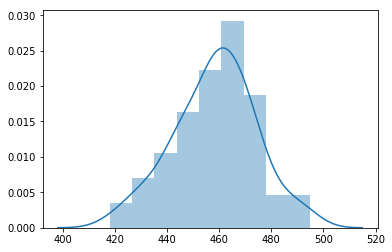

In [98]:
sns.distplot(sample_wins)

**Calculating Cohen's d**

In [106]:
cohen_d = (np.mean(sample_wins) - population_mean) / np.std(sample_wins, ddof=1)
cohen_d

-2.6498420571355576